1. Data preprocessing

In [2]:
import os
import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms
from torchvision.transforms import functional as TF
from torchvision.utils import save_image
from tqdm import tqdm
from PIL import Image, ImageDraw
from albumentations import Compose, Resize, Rotate, HorizontalFlip, VerticalFlip, Normalize
from albumentations.pytorch import ToTensorV2
import cv2
import random
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision.transforms import ToTensor
import os
import numpy as np
from PIL import Image
import json
import cv2
from torch.utils.data import Dataset
from albumentations.augmentations.transforms import CLAHE
import matplotlib.pyplot as plt

In [3]:
os.getcwd()
#os.chdir()
torch.cuda.is_available()
torch.__version__

'2.3.0+cu118'

Histogram of the Image Data

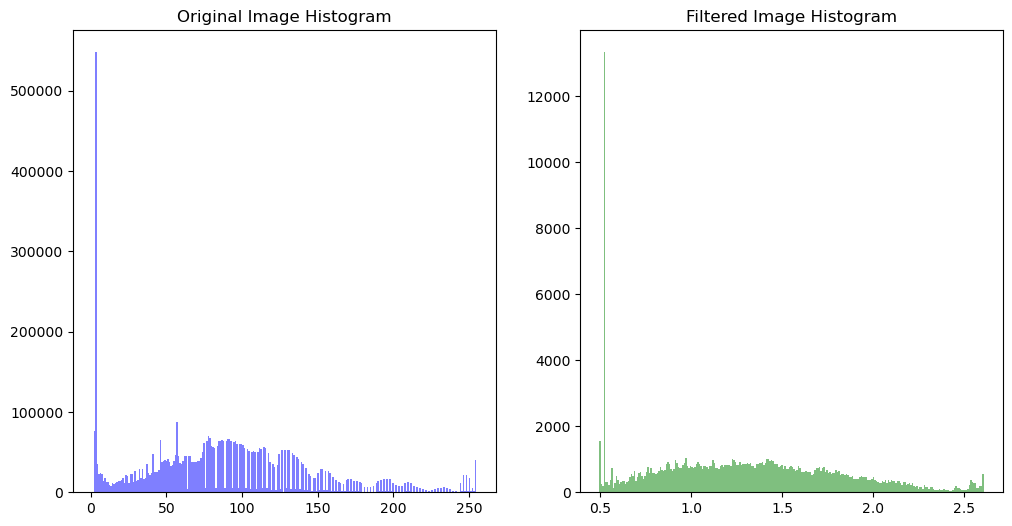

In [59]:
import cv2
import numpy as np
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
import torch

def load_image(image_path):
    return cv2.imread(image_path)

def apply_CLAHE(image):
    # Ensure the image is in RGB format
    if len(image.shape) == 2 or image.shape[2] == 1:  # If the image is grayscale
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    
    transform = A.Compose([
                A.CLAHE(clip_limit=1.5, tile_grid_size=(3, 3), p=1),
                A.Normalize(mean=[-0.2243, -0.2239, -0.2242], std=[0.4699, 0.4696, 0.4696]),
                A.Resize(224, 224),
                ToTensorV2()
    ])
    return transform(image=image)['image']
#mean = [0.3421006, 0.3421006, 0.3421006], std = [0.2168359, 0.21683595, 0.21683595]
def plot_histograms(original_img, filtered_img):
    # Convert images to numpy arrays for histogram plotting
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    filtered_img = filtered_img.permute(1, 2, 0).cpu().numpy()  # Convert tensor to numpy

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].hist(original_img.ravel(), bins=256, color='blue', alpha=0.5)
    ax[0].set_title('Original Image Histogram')
    ax[1].hist(filtered_img.ravel(), bins=256, color='green', alpha=0.5)
    ax[1].set_title('Filtered Image Histogram')
    plt.show()

# Example usage

image_path = 'Teeth Segmentation JSON/d2/img/train/378.jpg'
original_img = load_image(image_path)

# Apply CLAHE
filtered_img = apply_CLAHE(original_img)

# Plot histograms
plot_histograms(original_img, filtered_img)


image_path = 'Teeth Segmentation JSON/d2/img/train/378.jpg'

Visualization of transformed Image Dataset

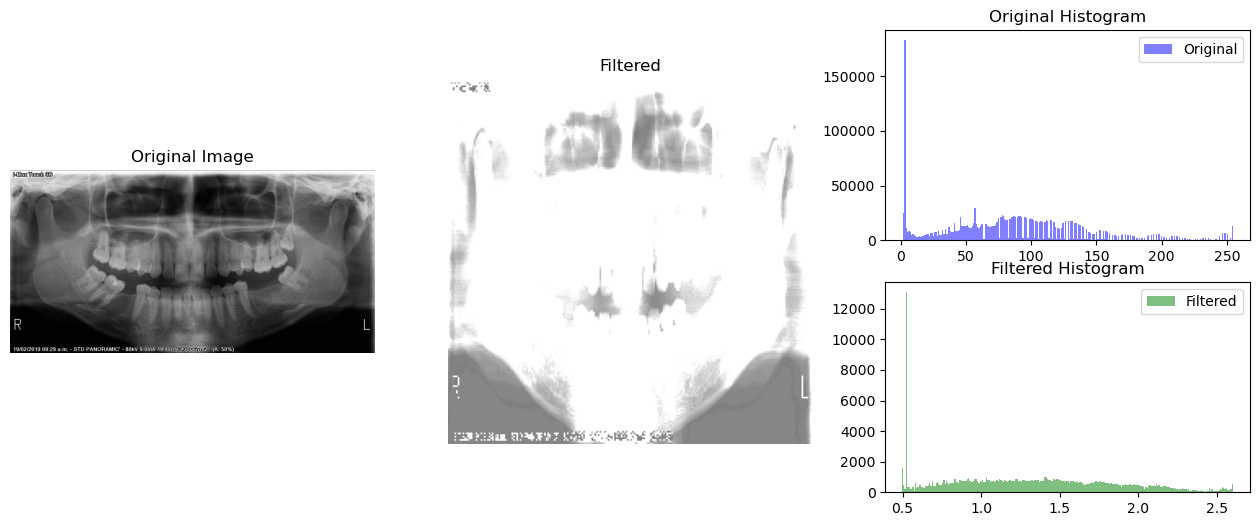

In [60]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2

def load_image(image_path):
    # 이미지를 그레이스케일로 로드
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


def plot_results(original_img, filtered_img):
    plt.figure(figsize=(16, 6))
    
    # 원본 이미지 출력
    plt.subplot(1, 3, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # 필터 적용 이미지 출력
    plt.subplot(1, 3, 2)
    plt.imshow(filtered_img.permute(1, 2, 0).numpy(), cmap='gray')
    plt.title('Filtered')
    plt.axis('off')
    
    # 원본 이미지 히스토그램 출력
    plt.subplot(2, 3, 3)
    plt.hist(original_img.ravel(), bins=256, color='blue', alpha=0.5, label='Original')
    plt.legend()
    plt.title('Original Histogram')
    
    # 필터 적용 이미지 히스토그램 출력
    plt.subplot(2, 3, 6)
    plt.hist(filtered_img.numpy().ravel(), bins=256, color='green', alpha=0.5, label='Filtered')
    plt.legend()
    plt.title('Filtered Histogram')
    
    plt.show()

# 이미지 경로 설정
image_path = 'Teeth Segmentation JSON/d2/img/train/378.jpg'

# 이미지를 불러오기
original_img = load_image(image_path)

# 가우시안 블러 적용
filtered_img = apply_CLAHE(original_img)

# 결과 출력
plot_results(original_img, filtered_img)


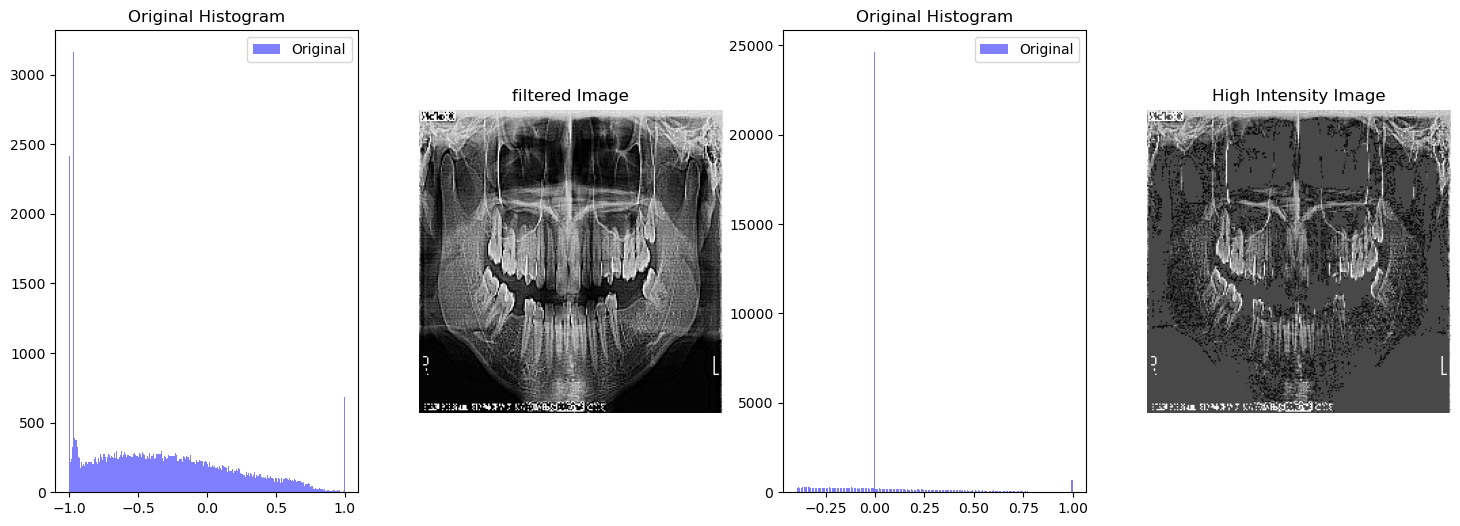

In [26]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import albumentations as A
import torch
from albumentations.pytorch import ToTensorV2

def load_image(image_path):
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def apply_gaussian_blur(image):
    transform = A.Compose([
                A.Resize(224,224),
                CLAHE(clip_limit=1.5, tile_grid_size=(3, 3), p=1),
                A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0)),
                A.Normalize(mean=[0.5], std=[0.5]),
                ToTensorV2()
    ])
    return transform(image=image)['image']

def highlight_high_intensity(image, threshold=-0.4):
    # 이미지 복사본 생성
    high_intensity_pixels = image.clone()
    # 특정 threshold 이하의 값을 0으로 설정
    high_intensity_pixels[high_intensity_pixels < threshold] = 0
    return high_intensity_pixels

def plot_results(original_img, filtered_img, highlighted_img):
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 4, 1)
    plt.hist(filtered_img.ravel(), bins=256, color='blue', alpha=0.5, label='Original')
    plt.legend()
    plt.title('Original Histogram')
    
    plt.subplot(1, 4, 2)
    plt.imshow(filtered_img.permute(1, 2, 0).numpy(), cmap='gray')
    plt.title('filtered Image')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.hist(highlighted_img.ravel(), bins=256, color='blue', alpha=0.5, label='Original')
    plt.legend()
    plt.title('Original Histogram')
    
    plt.subplot(1, 4, 4)
    plt.imshow(highlighted_img.permute(1, 2, 0).numpy(), cmap='gray')
    plt.title('High Intensity Image')
    plt.axis('off')
    
    plt.show()


# 이미지를 불러오기
original_img = load_image(image_path)

# 가우시안 블러 적용
filtered_img = apply_gaussian_blur(original_img)

# 고인텐시티 영역 강조
highlighted_img = highlight_high_intensity(filtered_img)

# 결과 출력
plot_results(original_img, filtered_img, highlighted_img)



In [15]:
import os
import numpy as np
from PIL import Image, UnidentifiedImageError
from tqdm import tqdm
import torch
from torchvision import transforms

def calculate_mean_std(image_dir):
    means = []
    stds = []

    # Define the transform to convert PIL image to tensor
    transform = transforms.ToTensor()

    # Supported image extensions
    image_extensions = {'.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff'}

    # Loop through all images in the directory
    for img_name in tqdm(os.listdir(image_dir)):
        img_path = os.path.join(image_dir, img_name)
        # Check if the file is an image by its extension
        if os.path.splitext(img_name)[1].lower() in image_extensions:
            try:
                img = Image.open(img_path).convert('RGB')  # Ensure the image is in RGB format
                img_tensor = transform(img)  # Convert image to tensor

                means.append(torch.mean(img_tensor, dim=(1, 2)))
                stds.append(torch.std(img_tensor, dim=(1, 2)))
            except UnidentifiedImageError:
                print(f"Cannot identify image file {img_path}. Skipping.")

    # Calculate mean and std for all images
    mean = torch.mean(torch.stack(means), dim=0)
    std = torch.mean(torch.stack(stds), dim=0)

    return mean.numpy(), std.numpy()

# Example usage
image_dir = "Teeth Segmentation JSON/d2/img/train"
mean, std = calculate_mean_std(image_dir)
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")


100%|██████████| 479/479 [00:29<00:00, 16.14it/s]

Mean: [0.3421006 0.3421006 0.3421006]
Standard Deviation: [0.21683595 0.21683595 0.21683595]


D